In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from scipy import stats
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')
%matplotlib inline

import os
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [7]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')
data2['음주여부'].fillna(0, inplace=True)
data = pd.concat([data1,data2])

drop_col = ['기준년도','가입자일련번호','데이터공개일자', '시력(좌)','시력(우)','구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석', '시도코드', '혈색소', '청력(좌)', '청력(우)', '총콜레스테롤', '트리글리세라이드',
'HDL콜레스테롤', 'LDL콜레스테롤']

data.drop(drop_col, axis=1, inplace=True)
data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000
999996,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000
999997,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000
999998,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000


In [8]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.tail()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
1983221,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000
1983222,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000
1983223,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000
1983224,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000
1983225,1,5,165,60,70.00000,120.00000,80.00000,85.00000,1.00000,1.00000,17.00000,12.00000,11.00000,1.00000,1.00000


In [9]:
def z_score_method(df, variable_name):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    print("index :",index)
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [10]:
z_outlier = z_score_method(data, '식전혈당(공복혈당)')
print(len(z_outlier))
data.drop(z_outlier, inplace=True)



index : 7
36459


In [11]:
data = data.reset_index(drop=True, inplace=False)
data.tail()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
1946762,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000
1946763,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000
1946764,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000
1946765,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000
1946766,1,5,165,60,70.00000,120.00000,80.00000,85.00000,1.00000,1.00000,17.00000,12.00000,11.00000,1.00000,1.00000


In [12]:
add_col = data['식전혈당(공복혈당)'].copy()
add_col[add_col < 126] = 0
add_col[add_col >= 126] = 1
data['당뇨여부'] = add_col
data.tail()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부
1946762,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000,0.00000
1946763,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000,0.00000
1946764,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000,0.00000
1946765,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000,0.00000
1946766,1,5,165,60,70.00000,120.00000,80.00000,85.00000,1.00000,1.00000,17.00000,12.00000,11.00000,1.00000,1.00000,0.00000


In [14]:
data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,0.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946762,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000,0.00000
1946763,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000,0.00000
1946764,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000,0.00000
1946765,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000,0.00000


In [15]:
data['당뇨여부'].sum()

118356.0

## phi correlation

In [18]:
from sklearn.metrics import matthews_corrcoef

y_true = data['당뇨여부'].values
y_pred = data['음주여부'].values

matthews_corrcoef(y_true,y_pred)

-0.016382223477025094

In [19]:
y_true = data['당뇨여부'].values
y_pred = data['성별코드'].values

matthews_corrcoef(y_true,y_pred)

0.030372858611436227

0 : indicates no relationship
1 : indicates a perfect positive relationship
-1 : indicates a perfect negative relationship

https://gaiag.tistory.com/68

https://medium.com/@cdefaux/phi-coefficient-a-k-a-matthews-correlation-coefficient-binary-classification-11e2c29db91e

## Random Forest

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import mglearn

In [39]:
X = data.drop(['당뇨여부','식전혈당(공복혈당)'], axis=1)
X

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,8,170,75,90.00000,120.00000,80.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000
1,1,7,180,80,89.00000,130.00000,82.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946762,2,11,165,75,84.00000,110.00000,70.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000
1946763,1,7,170,75,88.00000,136.00000,88.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000
1946764,1,8,175,80,87.00000,162.00000,90.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000
1946765,1,11,165,70,80.20000,140.00000,98.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000


In [40]:
y = data[['당뇨여부']]
y

,당뇨여부
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000
...,...
1946762,0.00000
1946763,0.00000
1946764,0.00000
1946765,0.00000


10개의 트리로 이루어진 랜덤 포레스트

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [47]:
print("TrainSet accuarcy : {:.3f}".format(forest.score(X_train, y_train)))
print("TestSet accuarcy : {:.3f}".format(forest.score(X_test, y_test)))

TrainSet accuarcy : 1.000
TestSet accuarcy : 0.939


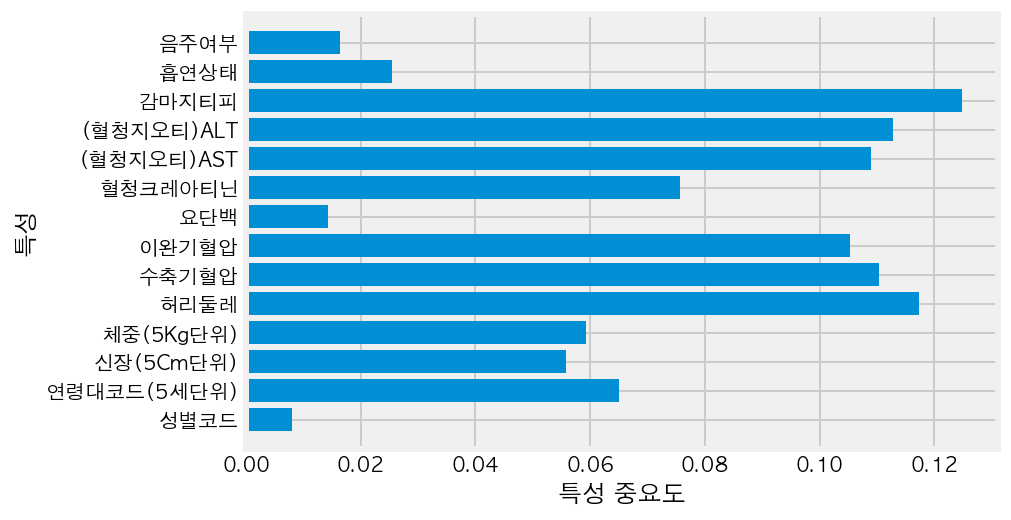

In [58]:
def plot_model(model):
    n_features = len(X.columns)
    feature_names = X.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    

plot_model(forest)
    